In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar100

# Charger les données CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Vérifier les formes des données
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

169001437/169001437 [==============================] - 4s 0us/step


In [3]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape((50000, 32, 32, 3))
x_train = x_train.astype('float32') / 255 
x_test = x_test.reshape((10000, 32, 32, 3))
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train, num_classes = 100) 
y_test = to_categorical(y_test, num_classes = 100)

y_train.shape

(50000, 100)

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

network = models.Sequential()

network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Dropout(0.25))

network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Dropout(0.25))

network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Dropout(0.5))

network.add(layers.Flatten())
network.add(layers.Dense(512, activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(100, activation='softmax'))

optimizer = Adam(lr=0.001)
network.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.summary()

epochs = 100
batch_size = 128
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

history = network.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 13, 13, 64)      

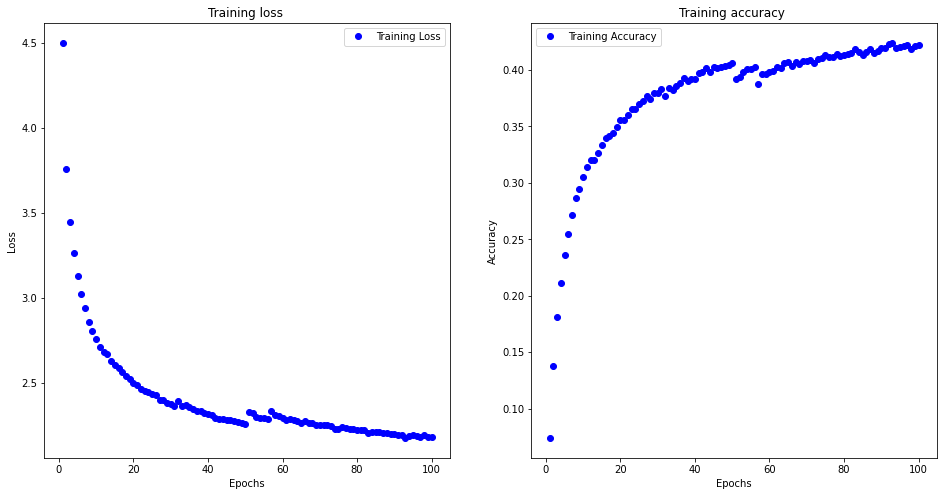

In [5]:
history_dict = history.history 
loss_values = history_dict['loss']
acc_values = history_dict['accuracy']
plt.rcParams['figure.figsize'] = (16,8) # Make the figures a bit bigger
fig,(ax1,ax2,) = plt.subplots(1,2)

x = range(1,epochs+1)
ax1.plot(x,loss_values,'bo',label='Training Loss')
ax1.set_title('Training loss ')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()


ax2.plot(x,acc_values,'bo',label='Training Accuracy')
ax2.set_title('Training accuracy ')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()